In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, average_precision_score, accuracy_score, mean_squared_error, precision_recall_curve, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\ML App\final.csv')

#### Scaling this column to between 0 and 1 probably

In [3]:
#Scaling this column to between 0 and 1
df['How many employees does your company or organization have?'] =(df['How many employees does your company or organization have?'] - min(df['How many employees does your company or organization have?'])) / (max(df['How many employees does your company or organization have?']) - min(df['How many employees does your company or organization have?']))

## Features and dependent variables

In [4]:
X = df.drop(columns=['Would you feel comfortable discussing a mental health issue with your coworkers?','Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?'], axis =1)
X = df.drop(columns=['Unnamed: 0'])#,'How many employees does your company or organization have?'],axis=1)#,'Is your employer primarily a tech company/organization?','Is your primary role within your company related to tech/IT?' ])

Y1=df['Would you feel comfortable discussing a mental health issue with your coworkers?']
Y2=df['Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?']

print('y1 :',Y1.value_counts())
print('y2 :',Y2.value_counts())

y1 : Would you feel comfortable discussing a mental health issue with your coworkers?
2    450
1    351
0    237
Name: count, dtype: int64
y2 : Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?
1    404
2    347
0    287
Name: count, dtype: int64


## Split the data into Training and test set

In [5]:
X_train_1, X_test_1, y1_train, y1_test = train_test_split(X, Y1, test_size = 0.2, random_state = 25)
X_train_2, X_test_2, y2_train, y2_test = train_test_split(X, Y2, test_size = 0.2, random_state = 25)

In [6]:
y1_test.value_counts()

Would you feel comfortable discussing a mental health issue with your coworkers?
2    95
1    64
0    49
Name: count, dtype: int64

In [7]:
def visualize_metrics(y_test, y_pred, title, y_score, pipe):
    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {title}")
    plt.show()

    # Convert y_test to binary labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # ROC Curve (one-vs-all)
    n_classes = y_test_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['blue', 'red', 'green']  # Customize colors here
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for Class {i}')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {title} (One-vs-All)')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve (one-vs-all)
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    plt.figure()
    colors = ['blue', 'red', 'green']  # Customize colors here
    for i, color in zip(range(n_classes), colors):
        plt.step(recall[i], precision[i], color=color, alpha=0.2, where='post', label=f'PR curve (AP = {average_precision[i]:.2f}) for Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall Curve for {title} (One-vs-All)')
    plt.legend(loc='upper right')
    plt.show()

# Implementing Machine Learning Models

### 1. Logistic Regression

* **What is Logistic Regression:** Statiscal method used to model the relationship between a binary dependent and one or more independet variables. 

* **Model Choice:** Binary dependent meaning it can only take 2 values

* **Scalability and Accuracy:** is scalable and can handle large database

* **Speed:** Relatively fast to train and predict

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:** 
   * Operates by estimating the coefficients of the independent variables that are most predictive of the dependent variable. 
   * These coefficients are used to create a linear equation that is then transformed by the logistic function to produce a probability value for the dependent variable taking on the value of 1.

In [8]:
# Define the final parameters for Logistic Regression
logistic_regression_params = {
    'solver': 'liblinear',
    'max_iter': 1000,
    'C': 1.624
}

# Create a Logistic Regression model with the specified parameters
logistic_regression_model = LogisticRegression(**logistic_regression_params)

# Create pipelines for both y1 and y2
pipe1 = make_pipeline(StandardScaler(), logistic_regression_model)
pipe2 = make_pipeline(StandardScaler(), logistic_regression_model)

# Fit the models and perform evaluations as before
pipe1.fit(X_train_1, y1_train)
print('Score for y1:', pipe1.score(X_test_1, y1_test))
print('Cross validation score for logistic regression to classify y1:', cross_val_score(pipe1, X, Y1, cv=10))

y1_pred = pipe1.predict(X_test_1)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

pipe2.fit(X_train_2, y2_train)
print('Score for y2:', pipe2.score(X_test_2, y2_test))
print('Cross validation score for logistic regression to classify y2:', cross_val_score(pipe2, X, Y2, cv=10))

y2_pred = pipe2.predict(X_test_2)
print('\n', confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe1.predict_proba(X_test_1)
y2_score = pipe2.predict_proba(X_test_2)

Score for y1: 0.9855769230769231
Cross validation score for logistic regression to classify y1: [0.95192308 0.94230769 0.97115385 0.98076923 0.99038462 0.99038462
 1.         0.99038462 0.96116505 0.91262136]

 [[48  1  0]
 [ 2 62  0]
 [ 0  0 95]] 

Score for y2: 0.9759615384615384
Cross validation score for logistic regression to classify y2: [0.98076923 0.99038462 0.99038462 0.99038462 0.97115385 0.99038462
 1.         0.99038462 0.95145631 0.88349515]

 [[57  2  0]
 [ 3 70  0]
 [ 0  0 76]] 



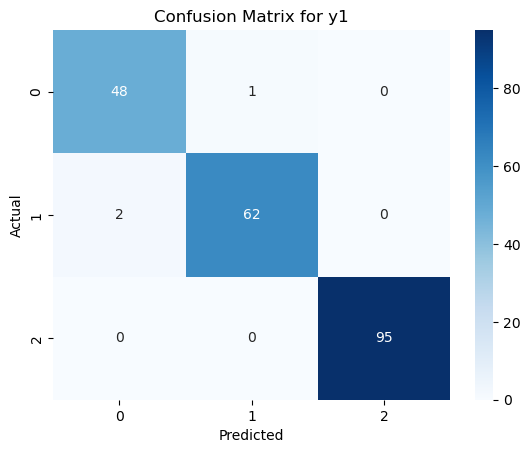

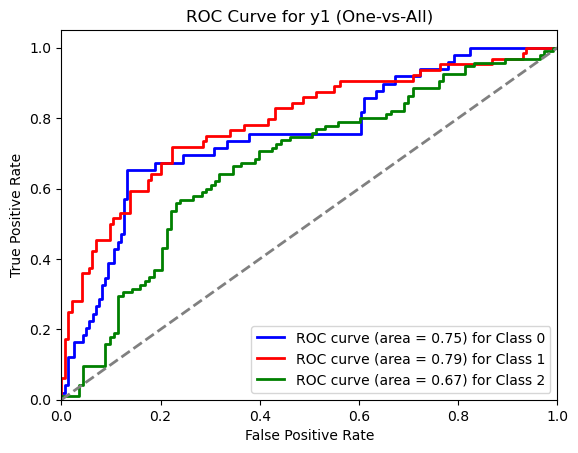

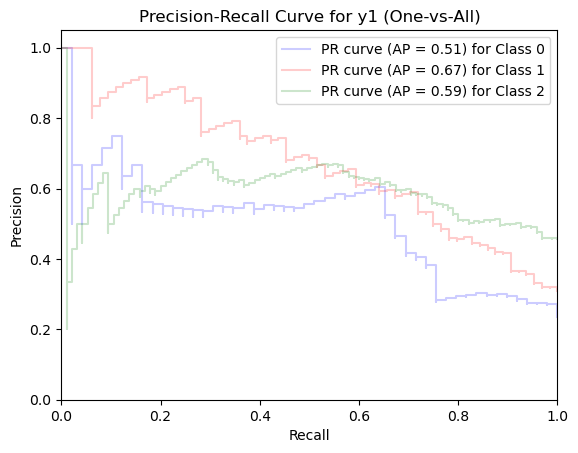

In [9]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe1)

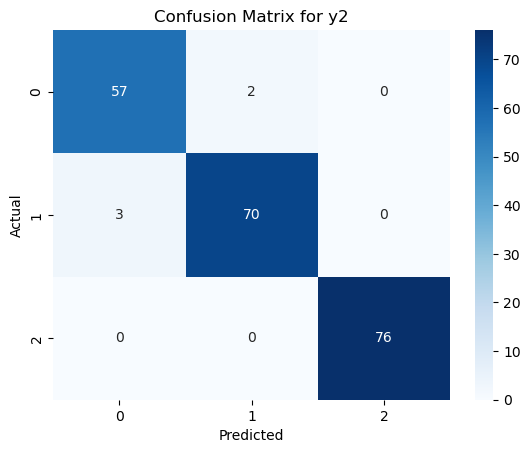

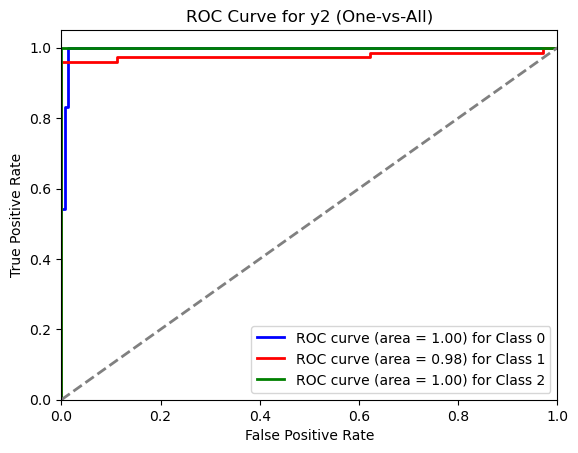

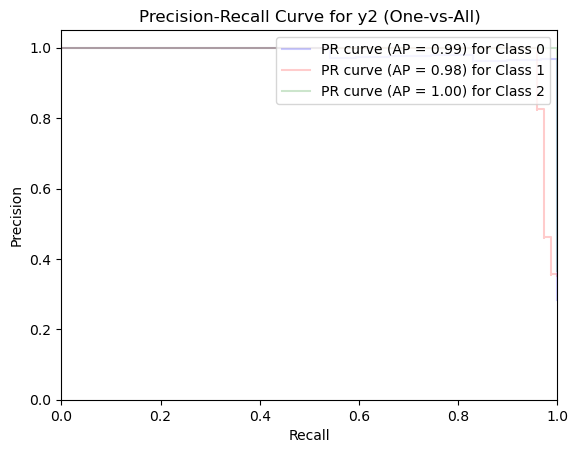

In [10]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe2)

### 2. XGBoost

* **What is XGBoost:** extreme gradient boosting, scalable, distributed gradient boosted decision tree. 

* **Model Choice:** Decision tree ensembles based, ensemble model consist of a set of classification and regression trees

* **Scalability and Accuracy:** Scalable and highly accurate implementation of gradient

* **Speed:** fast when compared other implementations

* **Integration with Other Libraries:** it can be integrated with the scikit-learn framework

* **Open Source:** True

* **How it Works:** 
    * GBoost operates on decision treesmodels that construct a graph that examines the input under various “if” statements. Whether the “if” condition is satisfied influences the next “if” condition and eventual prediction

In [11]:
# Define the final parameters for XGBoost
xgboost_params = {
    'n_estimators': 35,
    'max_depth': 26
}

# Create an XGBoost model with the specified parameters
xgboost_model = XGBClassifier(**xgboost_params)

# Create pipelines for both y1 and y2 using XGBoost
pipe3 = make_pipeline(StandardScaler(), xgboost_model)
pipe4 = make_pipeline(StandardScaler(), xgboost_model)

# Fit the models and perform evaluations as before
pipe3.fit(X_train_1, y1_train)
print('Score for y1:', pipe3.score(X_test_1, y1_test))
print('Cross-validation score for XGBoost to classify y1:', cross_val_score(pipe3, X, Y1, cv=10))

y1_pred = pipe3.predict(X_test_1)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

pipe4.fit(X_train_2, y2_train)
print('Score for y2:', pipe4.score(X_test_2, y2_test))
print('Cross-validation score for XGBoost to classify y2:', cross_val_score(pipe4, X, Y2, cv=10))

y2_pred = pipe4.predict(X_test_2)
print('\n', confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe3.predict_proba(X_test_1)
y2_score = pipe4.predict_proba(X_test_2)

Score for y1: 1.0
Cross-validation score for XGBoost to classify y1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 [[49  0  0]
 [ 0 64  0]
 [ 0  0 95]] 

Score for y2: 1.0
Cross-validation score for XGBoost to classify y2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 [[59  0  0]
 [ 0 73  0]
 [ 0  0 76]] 



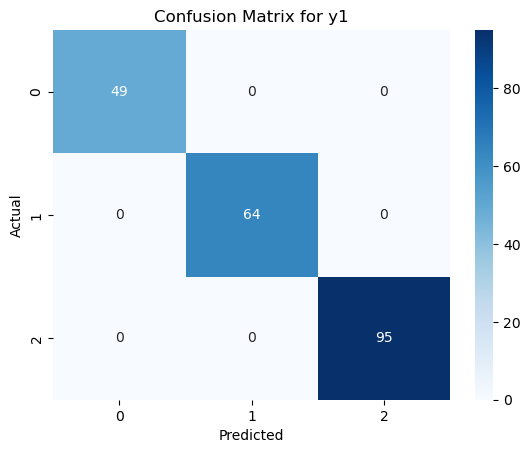

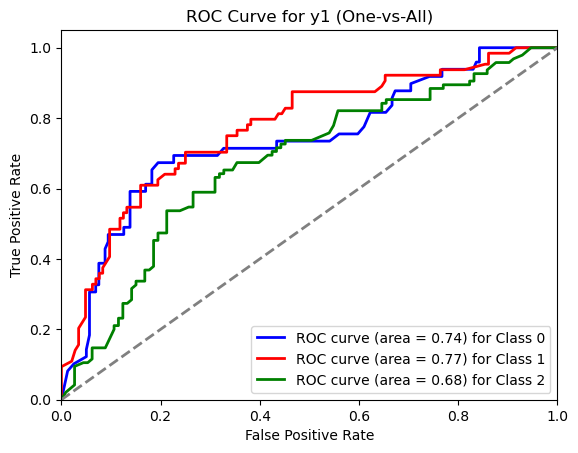

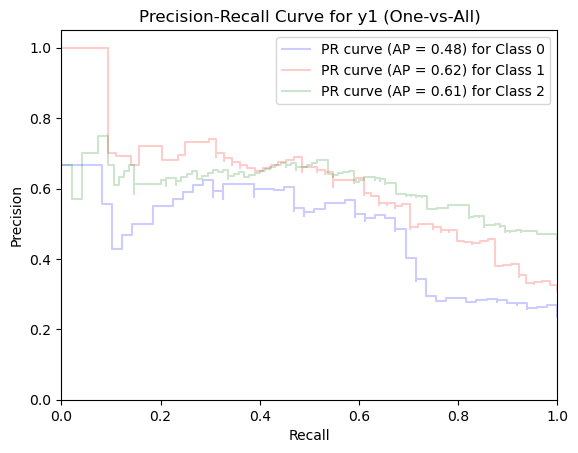

In [12]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe3)

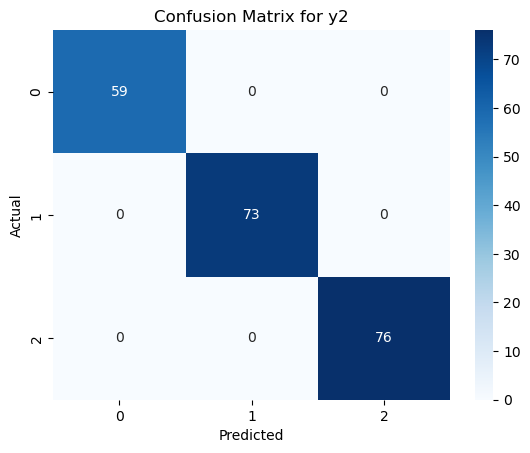

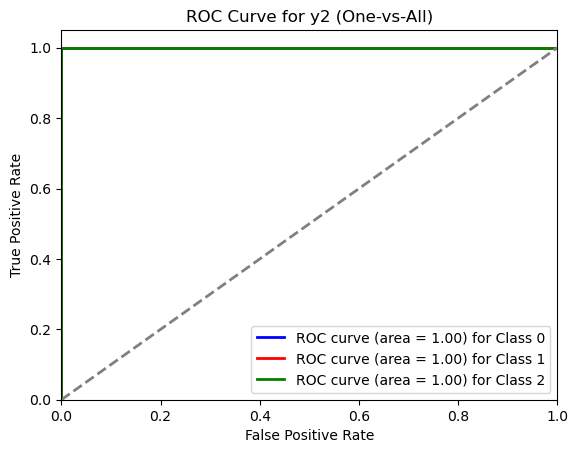

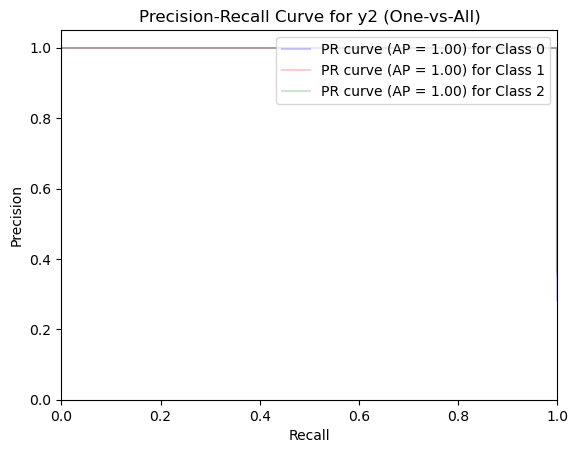

In [13]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe4)

### 3.Random Forest Classifier

* **What is Random Forest Classifier:** Machine learning method used to classify data into different categories based on multiple decision trees.

* **Model Choice:** Can handle both binary and multiclass classification problems.

* **Scalability and Accuracy:** Is scalable and can handle large datasets with high dimensionality. Also has high accuracy and reduces overfitting by averaging the predictions of multiple trees.

* **Speed:** Relatively slow to train and predict compared to simpler models.

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:** 
    * Creates a number of decision trees based on random subsets of features and samples from the dataset. 
    * Each tree makes a prediction for the class label of a new instance. 
    * The final prediction is the majority vote of all the trees.

In [14]:
# Define the final parameters for Random Forest Classifier
random_forest_params = {
    'n_estimators': 35,
    'max_depth': 26,
    'random_state': 10
}

# Create a Random Forest Classifier model with the specified parameters
random_forest_model = RandomForestClassifier(**random_forest_params)

# Create pipelines for both y1 and y2
pipe5 = make_pipeline(StandardScaler(), random_forest_model)
pipe6 = make_pipeline(StandardScaler(), random_forest_model)

# Fit the models and perform evaluations as before
pipe5.fit(X_train_1, y1_train)
print('Score for y1:', pipe5.score(X_test_1, y1_test))
print('Cross-validation score for Random Forest classifier to classify y1:', cross_val_score(pipe5, X, Y1, cv=10))

y1_pred = pipe5.predict(X_test_1)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

pipe6.fit(X_train_2, y2_train)
print('Score for y2:', pipe6.score(X_test_2, y2_test))
print('Cross-validation score for Random Forest classifier to classify y2:', cross_val_score(pipe6, X, Y2, cv=10))

y2_pred = pipe6.predict(X_test_2)
print('\n', confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe5.predict_proba(X_test_1)
y2_score = pipe6.predict_proba(X_test_2)

Score for y1: 0.9807692307692307
Cross-validation score for Random Forest classifier to classify y1: [0.99038462 0.94230769 0.99038462 1.         0.99038462 0.99038462
 1.         0.98076923 0.99029126 1.        ]

 [[46  3  0]
 [ 1 63  0]
 [ 0  0 95]] 

Score for y2: 0.9711538461538461
Cross-validation score for Random Forest classifier to classify y2: [0.98076923 1.         0.97115385 1.         0.98076923 1.
 0.98076923 0.99038462 0.96116505 1.        ]

 [[54  5  0]
 [ 1 72  0]
 [ 0  0 76]] 



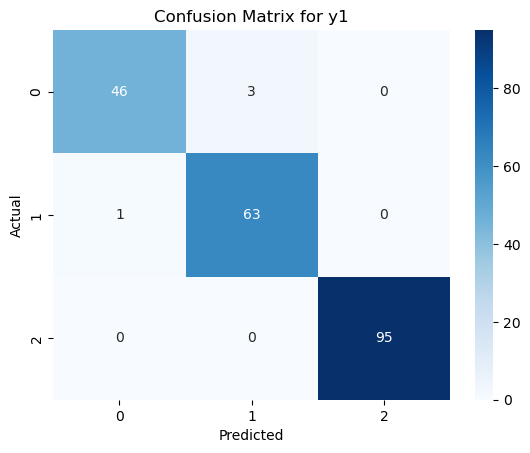

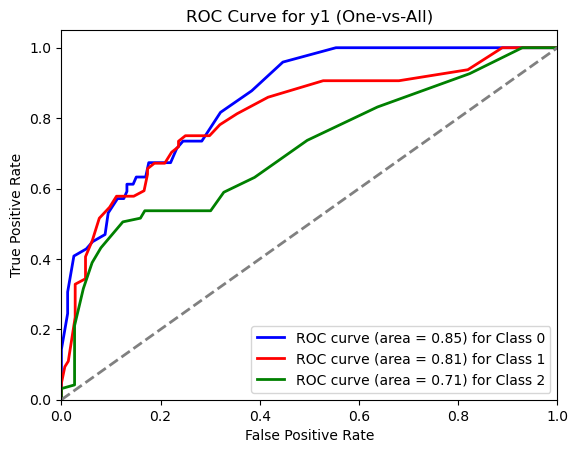

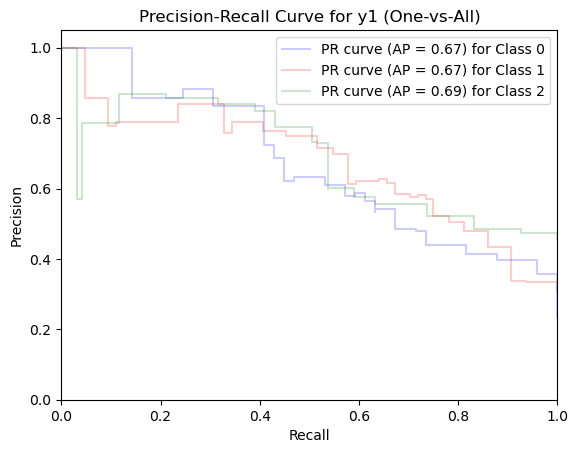

In [15]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe5)

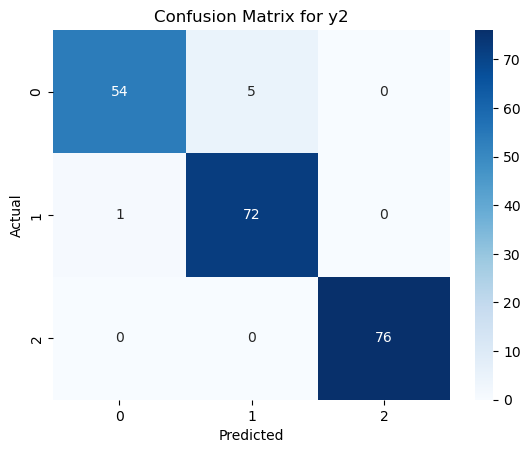

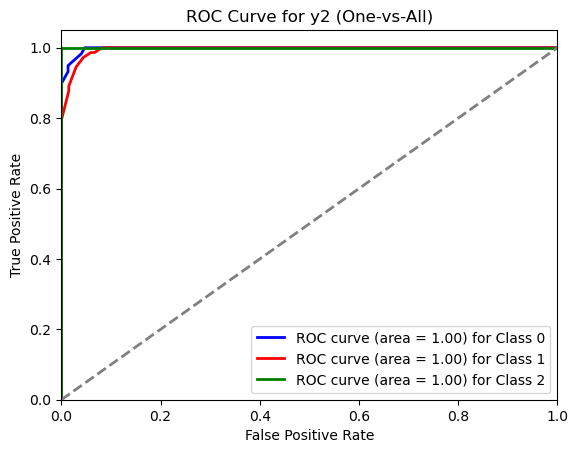

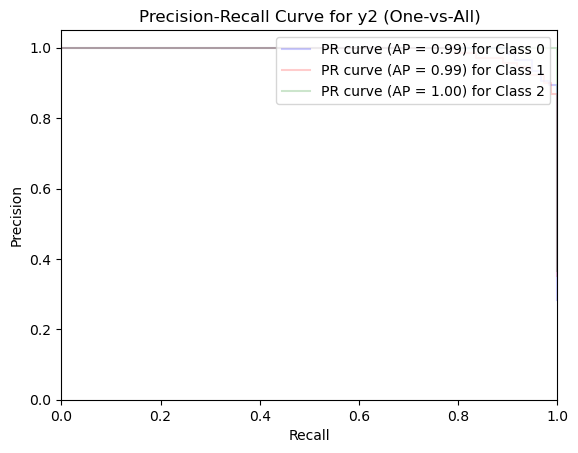

In [16]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe6)

### 4.Support Vector Machine (SVM)

* **What is Support Vector Machine:** Machine learning method used to find the optimal hyperplane that can separate data into different categories based on multiple features.

* **Model Choice:** Can handle both linear and nonlinear classification problems, as well as regression and outlier detection tasks.

* **Scalability and Accuracy:** Effective in high dimensional spaces, even when the number of dimensions is greater than the number of samples. Also has high accuracy and robustness to outliers by using the maximum margin principle.

* **Speed:** Relatively slow to train and predict compared to simpler models, especially when the kernel trick is used.

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:** 
    * Finds the hyperplane that has the largest distance to the nearest data point of any class. This distance is called the margin. 
    * The data points that are closest to the hyperplane are called support vectors, and they determine the position and orientation of the hyperplane. 
    * The hyperplane can be linear or nonlinear, depending on the choice of the kernel function that maps the data into a higher dimensional space. 
    * The kernel function allows SVM to handle complex and nonlinear relationships between the features and the target variable.

In [17]:
# Define the final parameters for SVM
svm_params = {
    'kernel': 'rbf',
    'gamma': 0.0001,
    'C': 100,
    'probability': True
}

# Create an SVM model with the specified parameters
svm_model = SVC(**svm_params)

# Create pipelines for both y1 and y2
pipe7 = make_pipeline(StandardScaler(), svm_model)
pipe8 = make_pipeline(StandardScaler(), svm_model)

# Fit the models and perform evaluations as before for y1
pipe7.fit(X_train_1, y1_train)
print('Score for y1:', pipe7.score(X_test_1, y1_test))
print('Cross validation score for SVM to classify y1:', cross_val_score(pipe7, X, Y1, cv=10))

y1_pred = pipe7.predict(X_test_1)
print('\nConfusion matrix for y1:\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

# Fit the models and perform evaluations as before for y2
pipe8.fit(X_train_2, y2_train)
print('Score for y2:', pipe8.score(X_test_2, y2_test))
print('Cross validation score for SVM to classify y2:', cross_val_score(pipe8, X, Y2, cv=10))

y2_pred = pipe8.predict(X_test_2)
print('\nConfusion matrix for y2:\n', confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe7.predict_proba(X_test_1)
y2_score = pipe8.predict_proba(X_test_2)

Score for y1: 1.0
Cross validation score for SVM to classify y1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Confusion matrix for y1:
 [[49  0  0]
 [ 0 64  0]
 [ 0  0 95]] 

Score for y2: 1.0
Cross validation score for SVM to classify y2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Confusion matrix for y2:
 [[59  0  0]
 [ 0 73  0]
 [ 0  0 76]] 



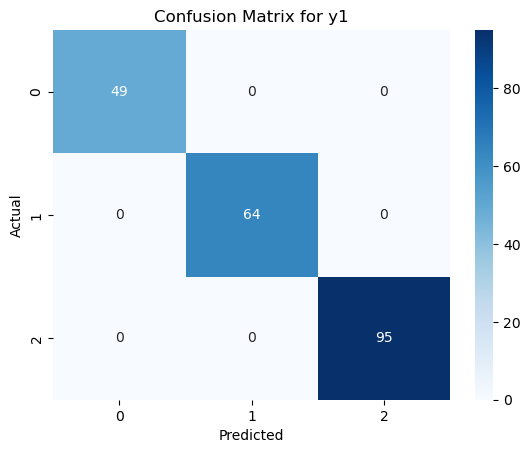

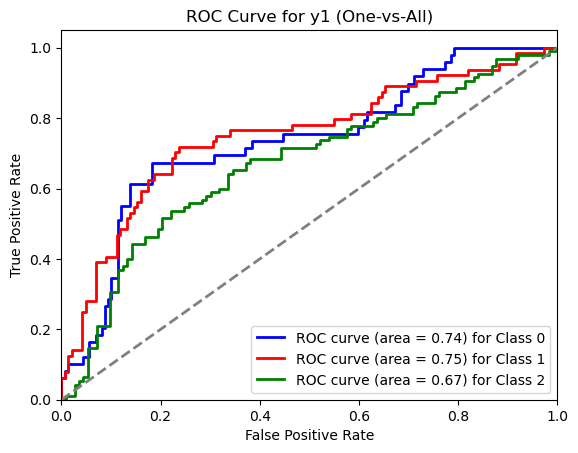

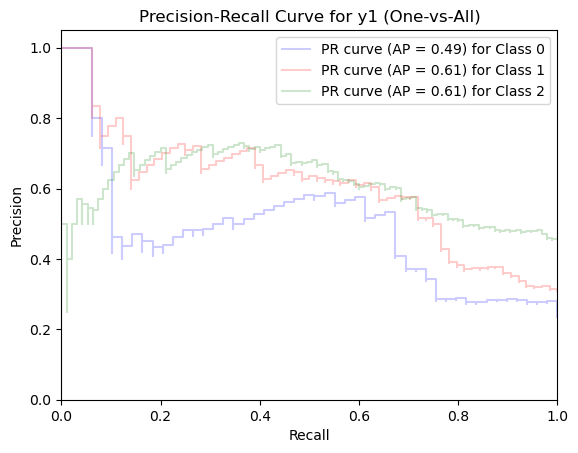

In [18]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe7)

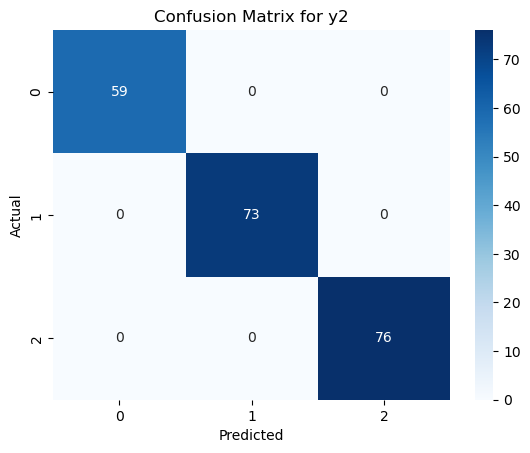

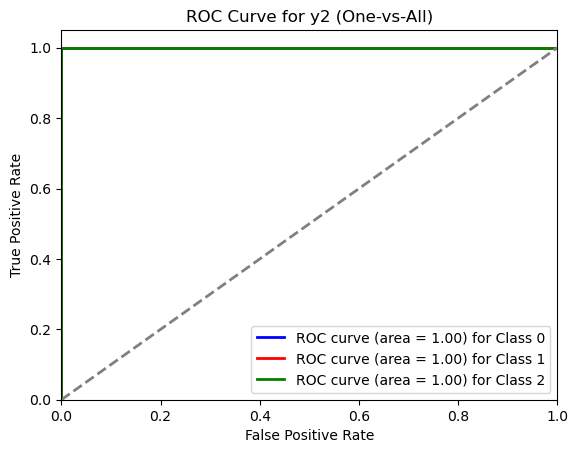

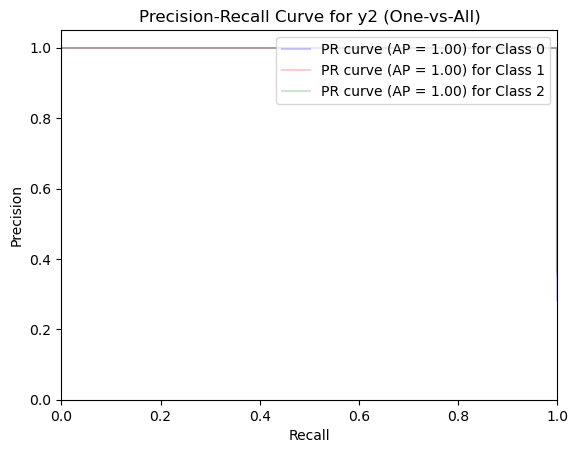

In [19]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe8)

### 5.AdaBoost Classifier

* **What is AdaBoost Classifier:** Machine learning method used to boost the performance of weak classifiers by combining them into a weighted ensemble.

* **Model Choice:** Can handle both binary and multiclass classification problems, as well as regression and outlier detection tasks.

* **Scalability and Accuracy:** Effective in high dimensional spaces, even when the number of dimensions is greater than the number of samples. Also has high accuracy and robustness to noise and outliers by using the adaptive boosting principle.

* **Speed:** Relatively fast to train and predict compared to more complex models, especially when the base classifier is simple.

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:** 
    * Creates a series of weak classifiers based on random subsets of features and samples from the dataset. Each classifier makes a prediction for the class label of a new instance. 
    * The final prediction is the weighted majority vote of all the classifiers. 
    * The weights of each classifier are determined by their training errors. 
    * The weights of each sample are updated after each iteration, such that misclassified samples are given more importance in the next iteration. This way, the algorithm focuses more on difficult cases and improves the overall accuracy.

In [20]:
# Define the final parameters for AdaBoost
ada_params = {
    'n_estimators': 180,
    'learning_rate': 0.201,
    'random_state': 0
}

# Create an AdaBoost model with the specified parameters
ada_model = AdaBoostClassifier(**ada_params)

# Create pipelines for both y1 and y2
pipe9 = make_pipeline(StandardScaler(), ada_model)
pipe10 = make_pipeline(StandardScaler(), ada_model)

# Fit the models and perform evaluations as before for y1
pipe9.fit(X_train_1, y1_train)
print('Score for y1:', pipe9.score(X_test_1, y1_test))
print('Cross validation score for AdaBoost to classify y1:', cross_val_score(pipe9, X, Y1, cv=10))

y1_pred = pipe9.predict(X_test_1)
print('\nConfusion matrix for y1:\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

# Fit the models and perform evaluations as before for y2
pipe10.fit(X_train_2, y2_train)
print('Score for y2:', pipe10.score(X_test_2, y2_test))
print('Cross validation score for AdaBoost to classify y2:', cross_val_score(pipe10, X, Y2, cv=10))

y2_pred = pipe10.predict(X_test_2)
print('\nConfusion matrix for y2:\n', confusion_matrix(y2_test, y2_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe9.predict_proba(X_test_1)
y2_score = pipe10.predict_proba(X_test_2)

Score for y1: 1.0
Cross validation score for AdaBoost to classify y1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Confusion matrix for y1:
 [[49  0  0]
 [ 0 64  0]
 [ 0  0 95]] 

Score for y2: 1.0
Cross validation score for AdaBoost to classify y2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Confusion matrix for y2:
 [[59  0  0]
 [ 0 73  0]
 [ 0  0 76]] 



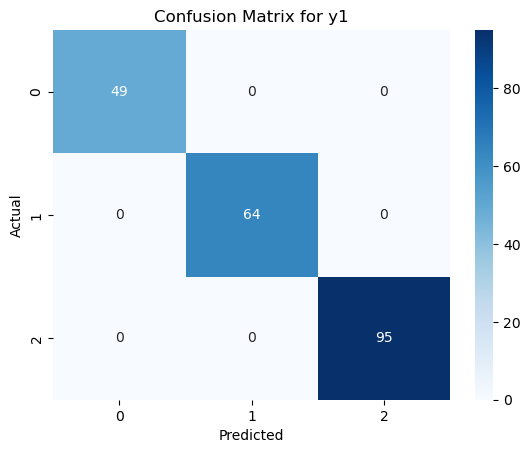

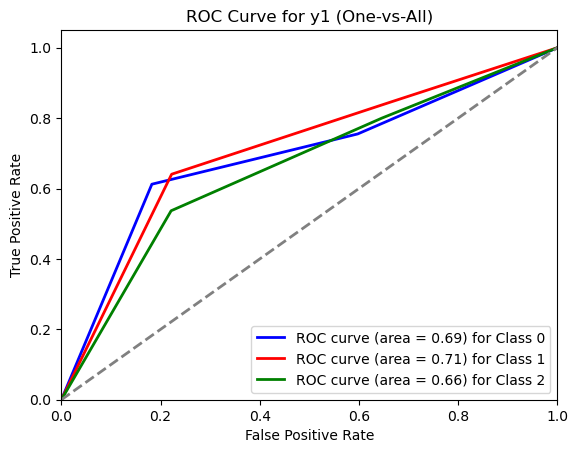

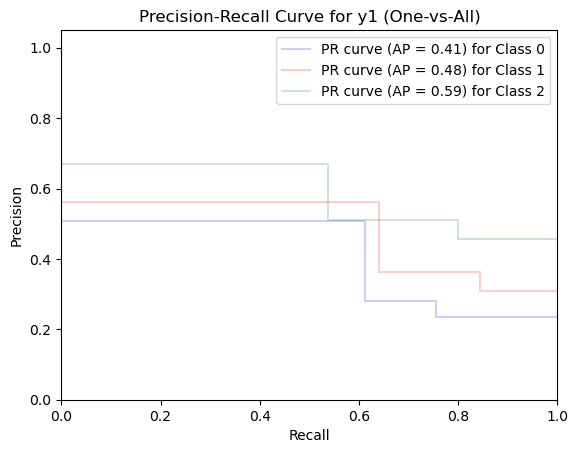

In [21]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe9)

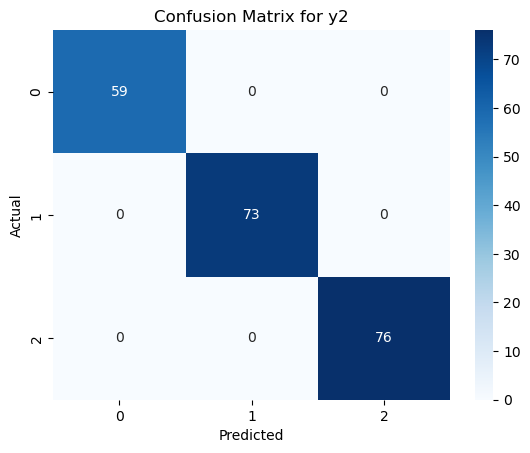

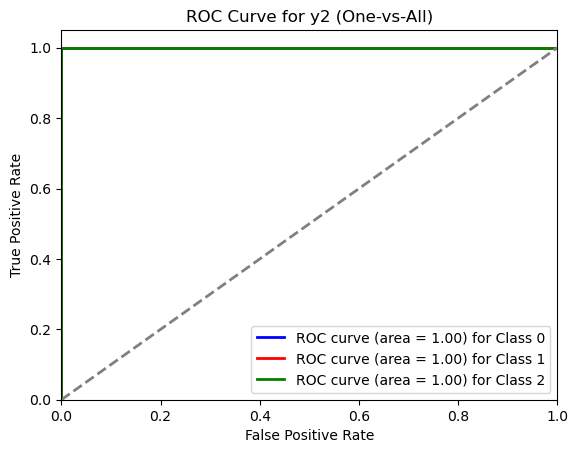

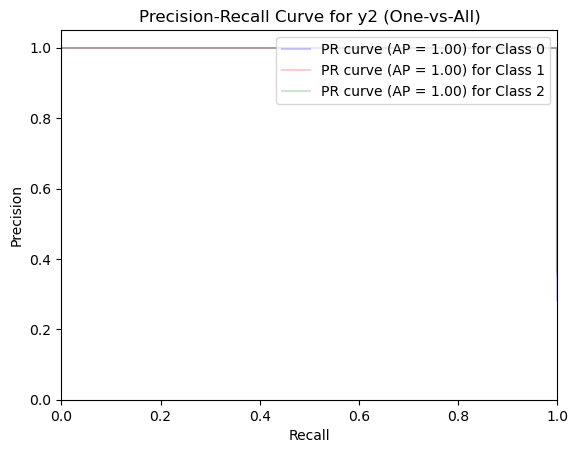

In [22]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe10)

### 6. Bagging Classifier

* **What is Bagging Classifier:** Machine learning method that combines multiple base models trained on random subsets of the data to reduce variance and improve accuracy.

* **Model Choice:** Can use any type of base model, such as decision trees, support vector machines, or neural networks. Can handle both classification and regression problems.

* **Scalability and Accuracy:** Scalable and effective in high dimensional spaces. Reduces overfitting and noise by averaging the predictions of multiple models.

* **Speed:** Relatively slow to train and predict compared to simpler models, especially when the number of base models is large.

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:**
    * Generates random subsets of the data using bootstrap sampling, which means picking data points with replacement.
    * Trains a base model on each subset independently and in parallel, using a specific learning algorithm.
    * Aggregates the predictions of all the base models, using majority voting for classification or averaging for regression.

In [23]:
# Define the final parameters for Bagging Classifier
bagging_params = {
    'base_estimator': RandomForestClassifier(n_estimators=100, random_state=42),
    'n_estimators': 50,
    'random_state': 42
}

# Create Bagging Classifier models for both y1 and y2 with the specified parameters
bagging_classifier_y1 = BaggingClassifier(**bagging_params)
bagging_classifier_y2 = BaggingClassifier(**bagging_params)

# Create pipelines for both y1 and y2
pipe11 = make_pipeline(StandardScaler(), bagging_classifier_y1)
pipe12 = make_pipeline(StandardScaler(), bagging_classifier_y2)

# Fit the models and perform evaluations as before
pipe11.fit(X_train_1, y1_train)
print('Score for y1:', pipe11.score(X_test_1, y1_test))
print('Cross validation score for logistic regression to classify y1:', cross_val_score(pipe11, X, Y1, cv=10))

y1_pred = pipe11.predict(X_test_1)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

pipe12.fit(X_train_2, y2_train)
print('Score for y2:', pipe12.score(X_test_2, y2_test))
print('Cross validation score for logistic regression to classify y2:', cross_val_score(pipe12, X, Y2, cv=10))

y2_pred = pipe12.predict(X_test_2)

# Calculate y1_score and y2_score
y1_score = pipe11.predict_proba(X_test_1)
y2_score = pipe12.predict_proba(X_test_2)

Score for y1: 0.9855769230769231
Cross validation score for logistic regression to classify y1: [0.98076923 0.95192308 0.99038462 1.         0.99038462 1.
 1.         1.         0.99029126 0.99029126]

 [[47  2  0]
 [ 1 63  0]
 [ 0  0 95]] 

Score for y2: 0.9711538461538461
Cross validation score for logistic regression to classify y2: [0.98076923 1.         0.98076923 0.98076923 0.97115385 1.
 1.         0.99038462 0.96116505 1.        ]


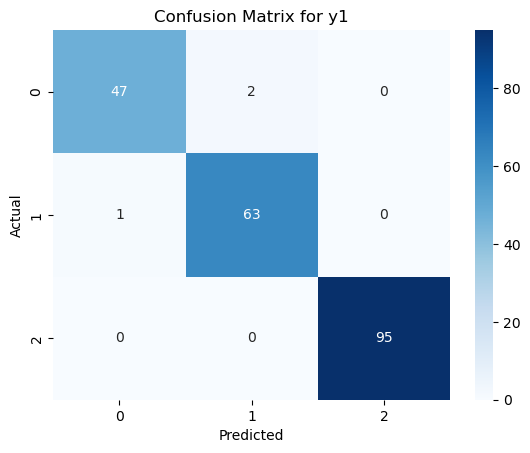

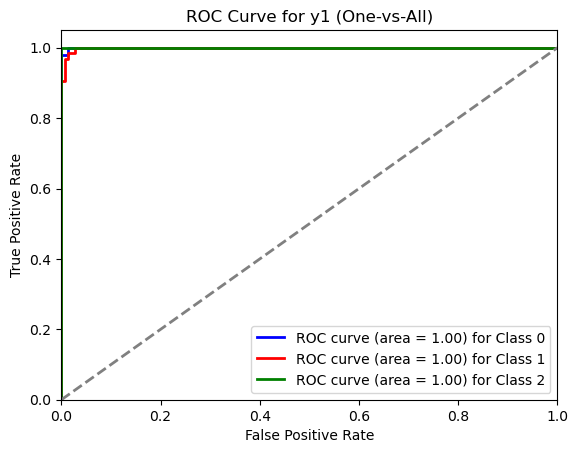

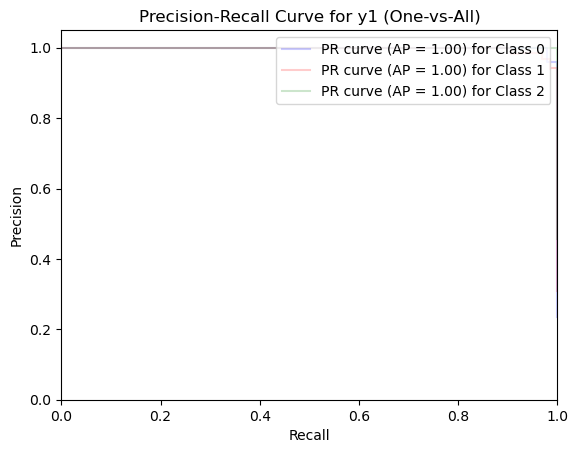

In [24]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe11)

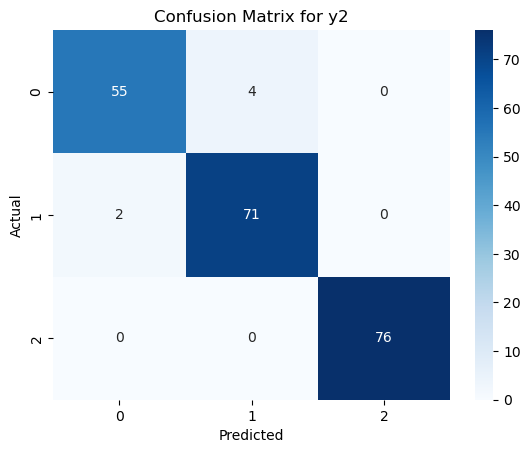

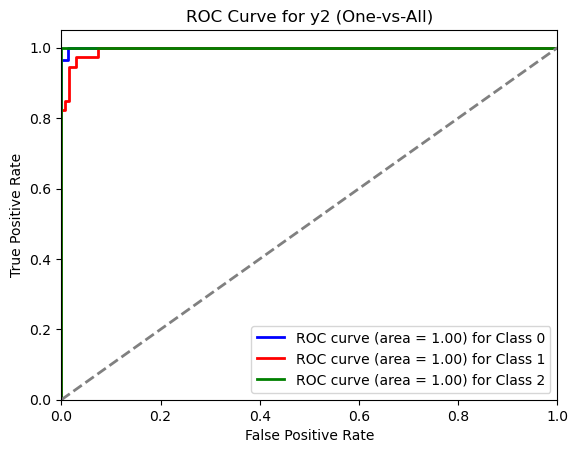

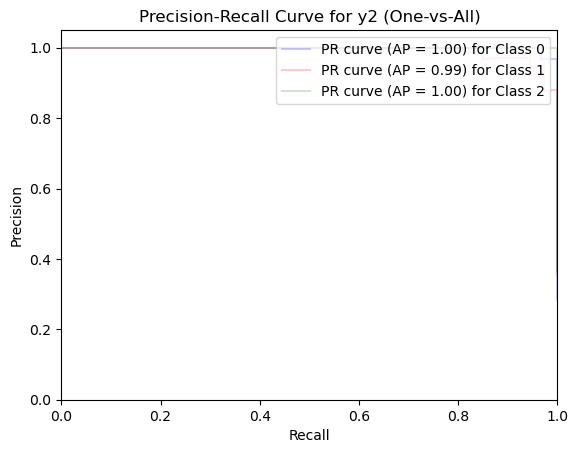

In [25]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe12)

### 7. Decision Tree

* **What is Decision Tree:** Machine learning method that creates a tree-like structure of decisions and outcomes based on the data features and the target variable.

* **Model Choice:** Can handle both classification and regression problems, as well as categorical and numerical features.

* **Scalability and Accuracy:** Can handle large datasets with high dimensionality, but may suffer from overfitting and instability if the tree grows too deep or complex.

* **Speed:** Relatively fast to train and predict compared to more sophisticated models, especially when using pruning techniques to reduce the size of the tree.

* **Integration with Other Libraries:** True

* **Open Source:** True

* **How it Works:**

    * Starts with the root node that represents the entire dataset and selects the best feature to split the data based on a metric such as entropy or Gini impurity.
    * Creates child nodes for each possible value of the feature and repeats the splitting process recursively until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.
    * Assigns a class label or a numerical value to each leaf node based on the majority vote or the mean of the target variable in that node.

In [26]:
# Define the final parameters for the Decision Tree Classifier
decision_tree_params = {
    'criterion': 'gini',
    'max_depth': 150,
    'random_state': 0
}

# Create Decision Tree Classifier models for both y1 and y2 with the specified parameters
decision_tree_classifier_y1 = DecisionTreeClassifier(**decision_tree_params)
decision_tree_classifier_y2 = DecisionTreeClassifier(**decision_tree_params)

# Create pipelines for both y1 and y2
pipe13 = make_pipeline(StandardScaler(), decision_tree_classifier_y1)
pipe14 = make_pipeline(StandardScaler(), decision_tree_classifier_y2)

# Fit the models and perform evaluations as before
pipe13.fit(X_train_1, y1_train)
print('Score for y1:', pipe13.score(X_test_1, y1_test))
print('Cross validation score for logistic regression to classify y1:', cross_val_score(pipe13, X, Y1, cv=10))

y1_pred = pipe13.predict(X_test_1)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

pipe14.fit(X_train_2, y2_train)
print('Score for y2:', pipe14.score(X_test_2, y2_test))
print('Cross validation score for logistic regression to classify y2:', cross_val_score(pipe14, X, Y2, cv=10))

y2_pred = pipe14.predict(X_test_2)
print('\n', confusion_matrix(y1_test, y1_pred, labels=[0, 1, 2]), '\n')

# Calculate y1_score and y2_score
y1_score = pipe13.predict_proba(X_test_1)
y2_score = pipe14.predict_proba(X_test_2)

Score for y1: 1.0
Cross validation score for logistic regression to classify y1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 [[49  0  0]
 [ 0 64  0]
 [ 0  0 95]] 

Score for y2: 1.0
Cross validation score for logistic regression to classify y2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 [[49  0  0]
 [ 0 64  0]
 [ 0  0 95]] 



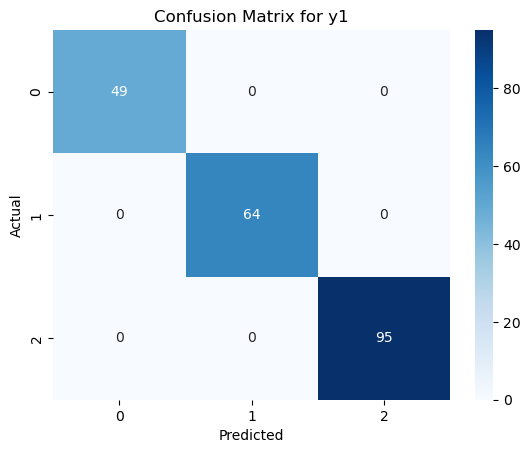

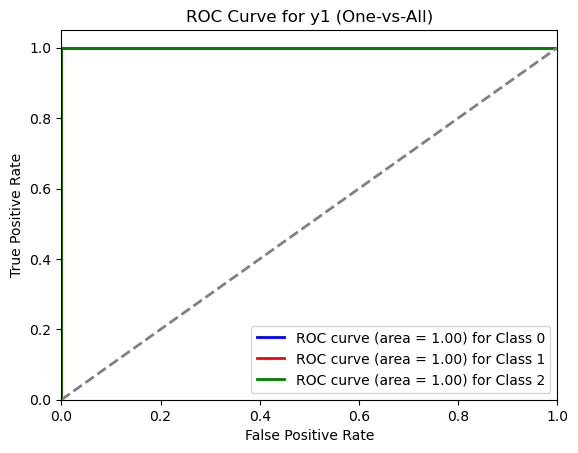

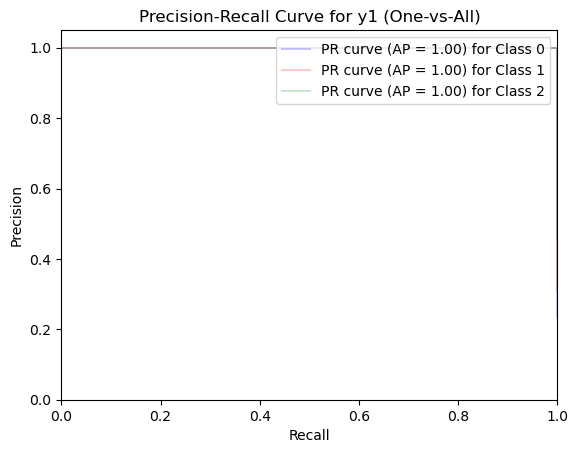

In [27]:
visualize_metrics(y1_test, y1_pred, "y1", y1_score, pipe13)

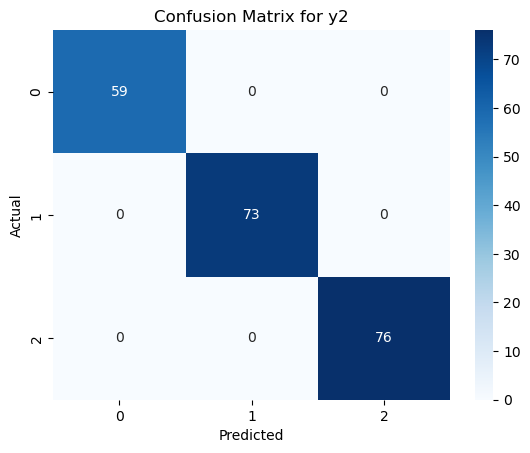

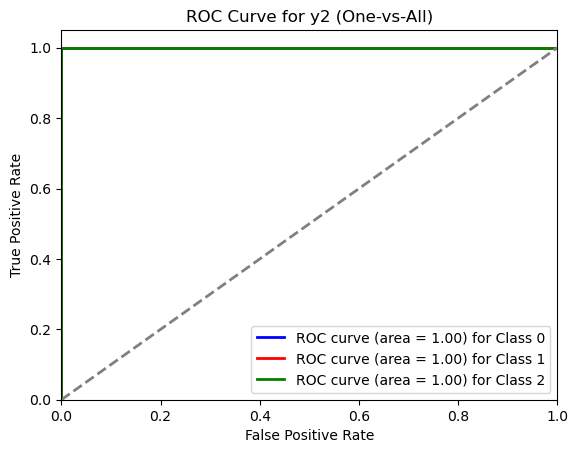

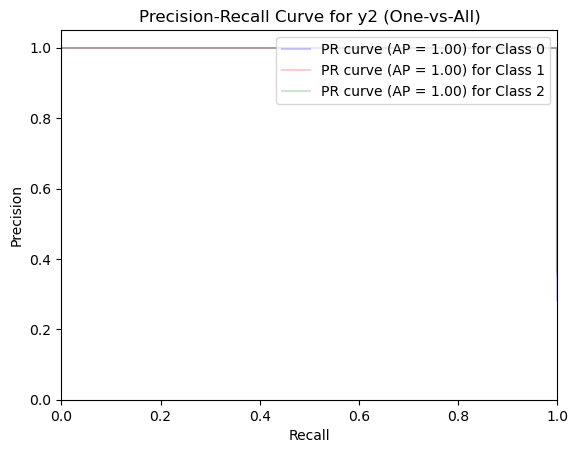

In [28]:
visualize_metrics(y2_test, y2_pred, "y2", y2_score, pipe14)